In [12]:
import requests
import pandas as pd

with open(f'api.key', 'r') as k:
    api_key = k.readline().strip()

url = f'https://www.omdbapi.com/?apikey={api_key}&i='
movie_content = []
with open(f'oscar_winners.csv', 'r') as a:
    for index, line in enumerate(a):
        if index == 0:
            continue
        omdb = line.strip().split(',')[1]
        url_to_fetch = url + omdb
        r = requests.get(url_to_fetch)
        movie_content.append(r.json())

clean_data =[]
for line in movie_content:
    title = line['Title']
    runtime_mins = int(line['Runtime'].split(' ')[0])
    genre = line['Genre']
    wins_nominations = line['Awards'].split('.')[1]
    wins_nominations = wins_nominations.split('&')
    wins = int(wins_nominations[0].strip().split(' ')[0])
    nominations = int(wins_nominations[1].strip().split(' ')[0])
    box_office_dollars = int(line['BoxOffice'][1:].replace(',',""))
    clean_data.append([title, runtime_mins, genre, wins, nominations, box_office_dollars])


movies = pd.DataFrame(clean_data)


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10 non-null     object
 1   1       10 non-null     int64 
 2   2       10 non-null     object
 3   3       10 non-null     int64 
 4   4       10 non-null     int64 
 5   5       10 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 608.0+ bytes


In [13]:
movies.rename(columns={0:'Title', 1: 'Runtime', 2: 'Genre', 3: 'Award Wins', 4: 'Award Nominations', 5: 'Box Office'})


Title  Runtime  \
0                                         Parasite      132   
1                                       Green Book      130   
2                               The Shape of Water      123   
3                                        Moonlight      111   
4                                        Spotlight      129   
5  Birdman or (The Unexpected Virtue of Ignorance)      119   
6                                 12 Years a Slave      134   
7                                             Argo      120   
8                                       The Artist      100   
9                                The King's Speech      118   

                        Genre  Award Wins  Award Nominations  Box Office  
0     Comedy, Drama, Thriller         308                271    53369749  
1    Biography, Comedy, Drama          59                124    85080171  
2     Drama, Fantasy, Romance         138                358    63859435  
3                       Drama         228                296    27854932  
4     Biography, Crime, Drama         124                143    45055776  
5               Comedy, Drama         193                292    42340598  
6   Biography, Drama, History         242                336    56671993  
7  Biography, Drama, Thriller          94                156   136025503  
8      Comedy, Drama, Romance         162                204    44671682  
9   Biography, Drama, History         108                206   138797449

In [19]:
movies.to_csv(r'C:/Users/bbsj4/Desktop/Data Analyst Cert Treehouse/UNIT_8/Project8/movie.csv', index=True)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv(r'C:/Users/bbsj4/Desktop/Data Analyst Cert Treehouse/UNIT_8/Project8/movie.csv')

a.	(Graph) What was the runtime for each movie? 
b.	What movie had the longest runtime? 
c.	Is there any relationship between the length of the movie (runtime) and the number of awards a movie won? 
d.	(Graph) How many awards and nominations did each movie receive? 


<BarContainer object of 10 artists>

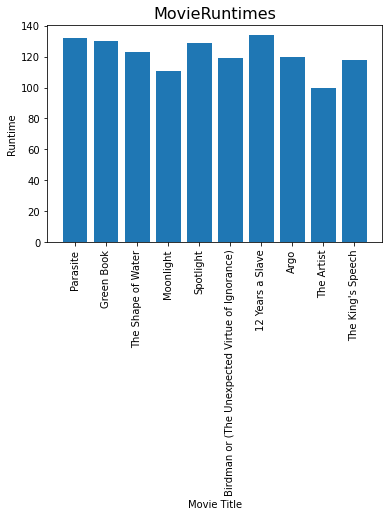

In [39]:
plt.xlabel('Movie Title')
plt.ylabel('Runtime')
plt.title('MovieRuntimes', fontsize=16)
plt.xticks(rotation=90)

plt.bar(data["Title"], data["Runtime"])

In [46]:
long = data.sort_values(
...     by="Runtime",
...     ascending=False
... )
long.head()

Unnamed: 0               Title  Runtime                      Genre  Wins  \
6           6    12 Years a Slave      134  Biography, Drama, History   242   
0           0            Parasite      132    Comedy, Drama, Thriller   308   
1           1          Green Book      130   Biography, Comedy, Drama    59   
4           4           Spotlight      129    Biography, Crime, Drama   124   
2           2  The Shape of Water      123    Drama, Fantasy, Romance   138   

   Nominations  Box Office  
6          336    56671993  
0          271    53369749  
1          124    85080171  
4          143    45055776  
2          358    63859435

To answer questions 1 and 2:
  I created a bar chart with the runtime for each movie. 
  Then, I sorted the table by Runtime to find the longest runtime. 
  The longest runtime is 12 Years a Slave with a runtime of 134 mins. 

In [47]:
print(data['Runtime'].corr(data['Wins']))

0.11770989138924326


<AxesSubplot:xlabel='Runtime', ylabel='Wins'>

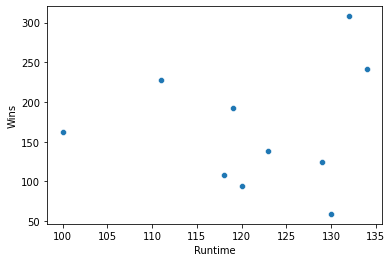

In [48]:
sns.scatterplot(x='Runtime', y='Wins', data=data)

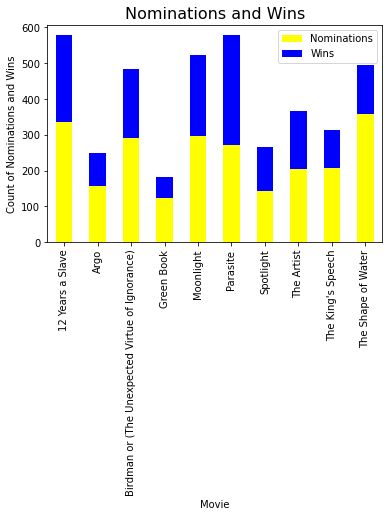

In [50]:
noms_wins = data[['Title', 'Nominations', 'Wins']]

x = noms_wins.groupby(['Title']).sum()
x_ind=x.reset_index()
x_ind.set_index('Title').plot(kind='bar', stacked=True, color=['yellow', 'blue'])

plt.xlabel('Movie')
plt.ylabel('Count of Nominations and Wins')
plt.title('Nominations and Wins', fontsize=16)
plt.show()

In [64]:
noms_wins = data[['Title', 'Nominations', 'Wins']]

x = noms_wins.groupby(['Title']).sum()
x

Nominations  Wins
Title                                                             
12 Years a Slave                                         336   242
Argo                                                     156    94
Birdman or (The Unexpected Virtue of Ignorance)          292   193
Green Book                                               124    59
Moonlight                                                296   228
Parasite                                                 271   308
Spotlight                                                143   124
The Artist                                               204   162
The King's Speech                                        206   108
The Shape of Water                                       358   138

In [62]:
sum = [(data['Nominations'] + data['Wins'])]
sum

[0    579
 1    183
 2    496
 3    524
 4    267
 5    485
 6    578
 7    250
 8    366
 9    314
 dtype: int64]